In [2]:
# impmort modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
claims_df = pd.read_csv('ClaimScope/data/synthetic_claims.csv')
claims_df

,policy_id,claim_id,incident_date,report_date,claim_type,claim_amount,adjuster_notes,is_fraud,age,gender,location,location_risk_score
0,bdd640fb,3ea16e1d,2024-10-14,2024-11-06,property,3245.25,Claim filed for property. Damage to roof cause...,0.0,52.0,M,Johnberg (Suburban),NaN
1,NaN,b29ce740,2024-07-30,2024-07-31,property,7555.22,Inspection for property revealed structural da...,0.0,42.0,M,New Roberttown (Suburban),0.497
2,bd9c66b3,b398e4fc,2024-11-15,2024-12-07,liability,5103.15,Adjuster notes for liability. Policyholder res...,NaN,42.0,M,New Roberttown (Suburban),0.497
3,96da1dac,bc5feb6a,2024-06-29,2024-07-12,property,13160.20,Policyholder filed a property claim for broken...,0.0,67.0,M,Lisatown (Suburban),0.522
4,96da1dac,561be345,2024-05-24,2024-06-07,auto,3345.94,Claim involves auto. Noted scratches on driver...,0.0,67.0,M,Lisatown (Suburban),0.522
...,...,...,...,...,...,...,...,...,...,...,...,...
10051,03b0c4c0,afe4ad90,2024-10-10,2024-11-09,auto,1940.93,auto claim reported by policyholder. Adjuster ...,0.0,57.0,M,New Coryport (Urban),0.812
10052,03b0c4c0,11faac50,2024-02-04,NaN,auto,1829.61,Incident involves auto. Confirmed collision wi...,0.0,57.0,M,New Coryport (Urban),0.812
10053,4be972b5,NaN,2024-05-08,2024-05-24,health,4689.20,Claim filed for health. Medical expenses for s...,0.0,32.0,F,Erictown (Suburban),0.487
10054,4be972b5,caeac902,2024-05-31,2024-06-20,liability,4755.81,Policyholder found liable for injuries caused ...,0.0,32.0,F,Erictown (Suburban),0.487


In [5]:
# Basic Overview
claims_df.info()

claims_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10056 entries, 0 to 10055
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            9584 non-null   object 
 1   claim_id             9578 non-null   object 
 2   incident_date        9541 non-null   object 
 3   report_date          9538 non-null   object 
 4   claim_type           9540 non-null   object 
 5   claim_amount         9568 non-null   float64
 6   adjuster_notes       9539 non-null   object 
 7   is_fraud             9534 non-null   float64
 8   age                  9533 non-null   float64
 9   gender               9578 non-null   object 
 10  location             9563 non-null   object 
 11  location_risk_score  9543 non-null   float64
dtypes: float64(4), object(8)
memory usage: 942.9+ KB


,claim_amount,is_fraud,age,location_risk_score
count,9568.000000,9534.000000,9533.000000,9543.000000
mean,7147.644554,0.049192,45.009126,0.584065
std,6872.038622,0.216281,14.441942,0.193534
min,-4904.210000,0.000000,18.000000,0.273000
25%,3738.677500,0.000000,35.000000,0.483000
50%,5864.775000,0.000000,45.000000,0.511000
75%,8912.180000,0.000000,55.000000,0.795000
max,157262.320000,1.000000,90.000000,0.845000


In [24]:
# Missing Values Overview
# calculate missing values and percentages
missing_counts = claims_df.isnull().sum()
missing_percentage = (missing_counts / len(claims_df)) * 100
pd.concat([missing_counts, missing_percentage], axis=1, keys=["Count", "Percent"])

,Count,Percent
policy_id,472,4.693715
claim_id,478,4.753381
incident_date,515,5.121321
report_date,518,5.151154
claim_type,516,5.131265
claim_amount,488,4.852824
adjuster_notes,517,5.141209
is_fraud,522,5.190931
age,523,5.200875
gender,478,4.753381


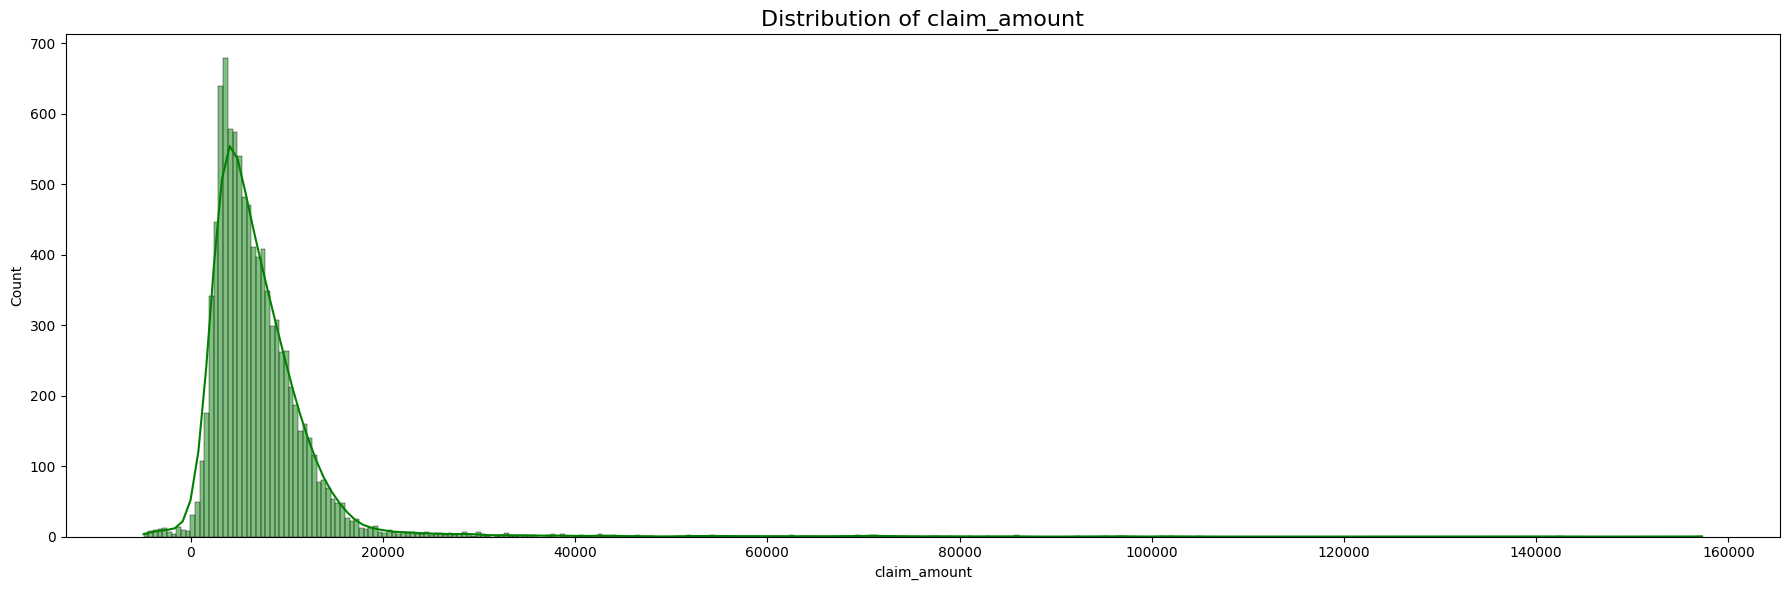

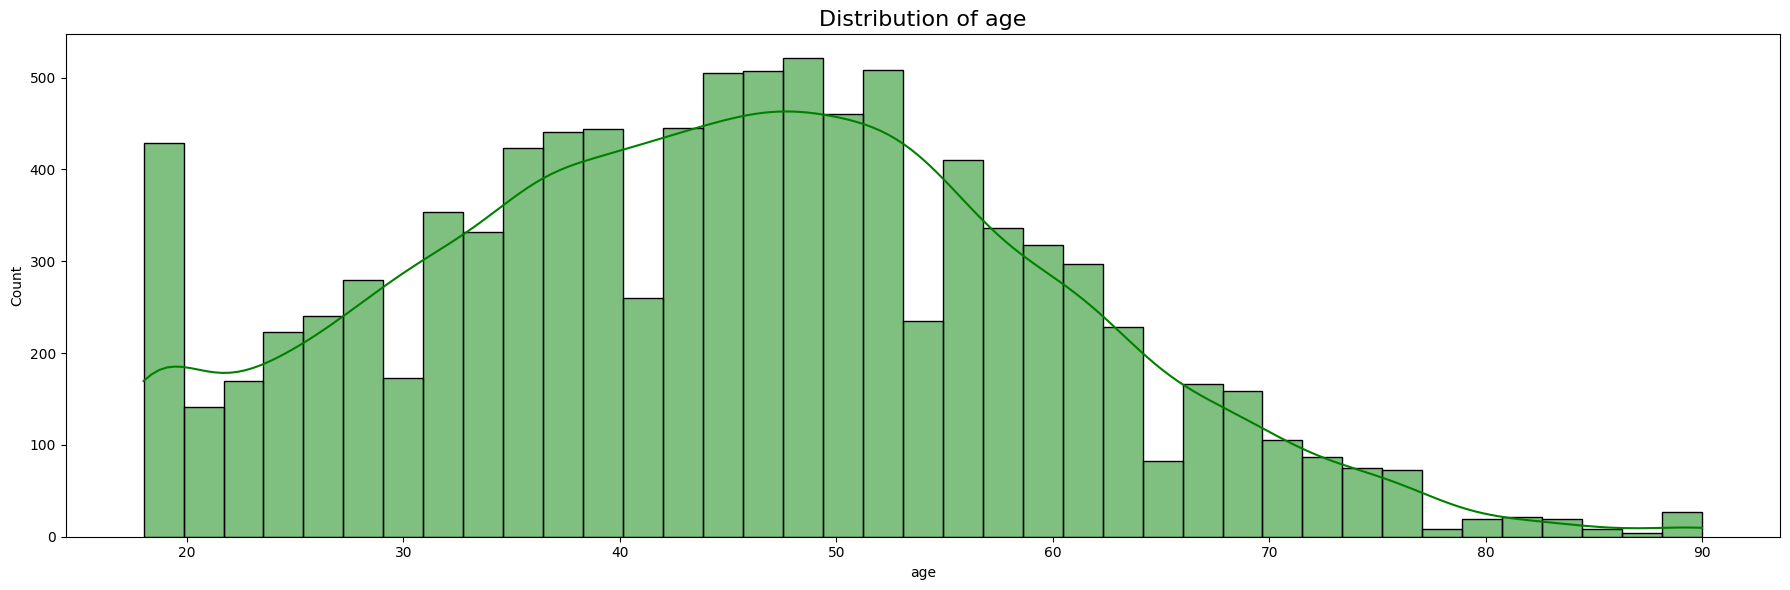

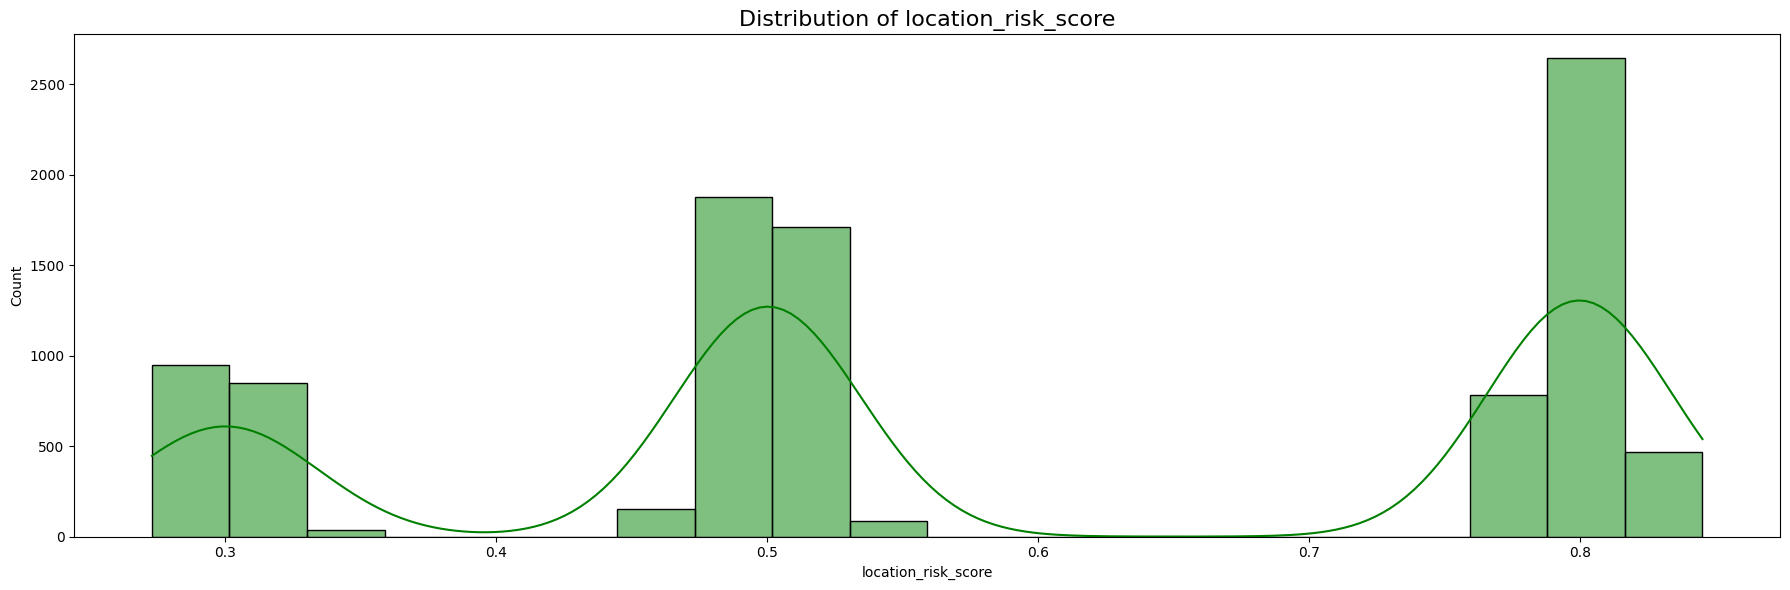

In [ ]:
# Distribution of Key Numeric Columns

# plot histograms for numeric columns 
for col in ['claim_amount', 'age', 'location_risk_score']:
        plt.figure(figsize=(18, 6))
        plt.title(f"Distribution of {col}", fontsize=16)
        sns.histplot(claims_df[col], kde=True, color='green')
        plt.tight_layout()
        plt.savefig(f"ClaimScope/data/eda_{col}_distribution.png", dpi=200)

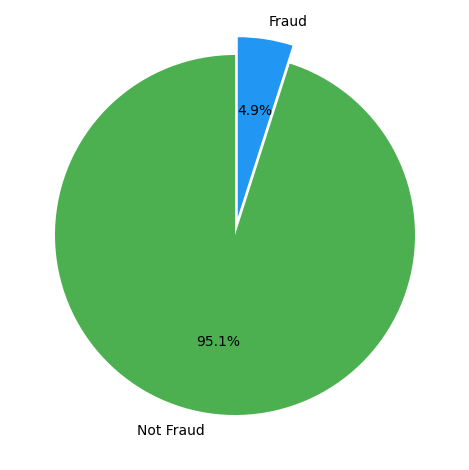

In [8]:
# pie chart for fraud %
plt.pie(claims_df['is_fraud'].value_counts(), 
        labels=['Not Fraud', 'Fraud'], 
        autopct='%1.1f%%',
        startangle=90,
        colors = ['#4CAF50', '#2196F3'], 
        explode = [0, 0.1]
        )
plt.savefig("ClaimScope/data/eda_fraud.png", dpi=200)
plt.tight_layout()

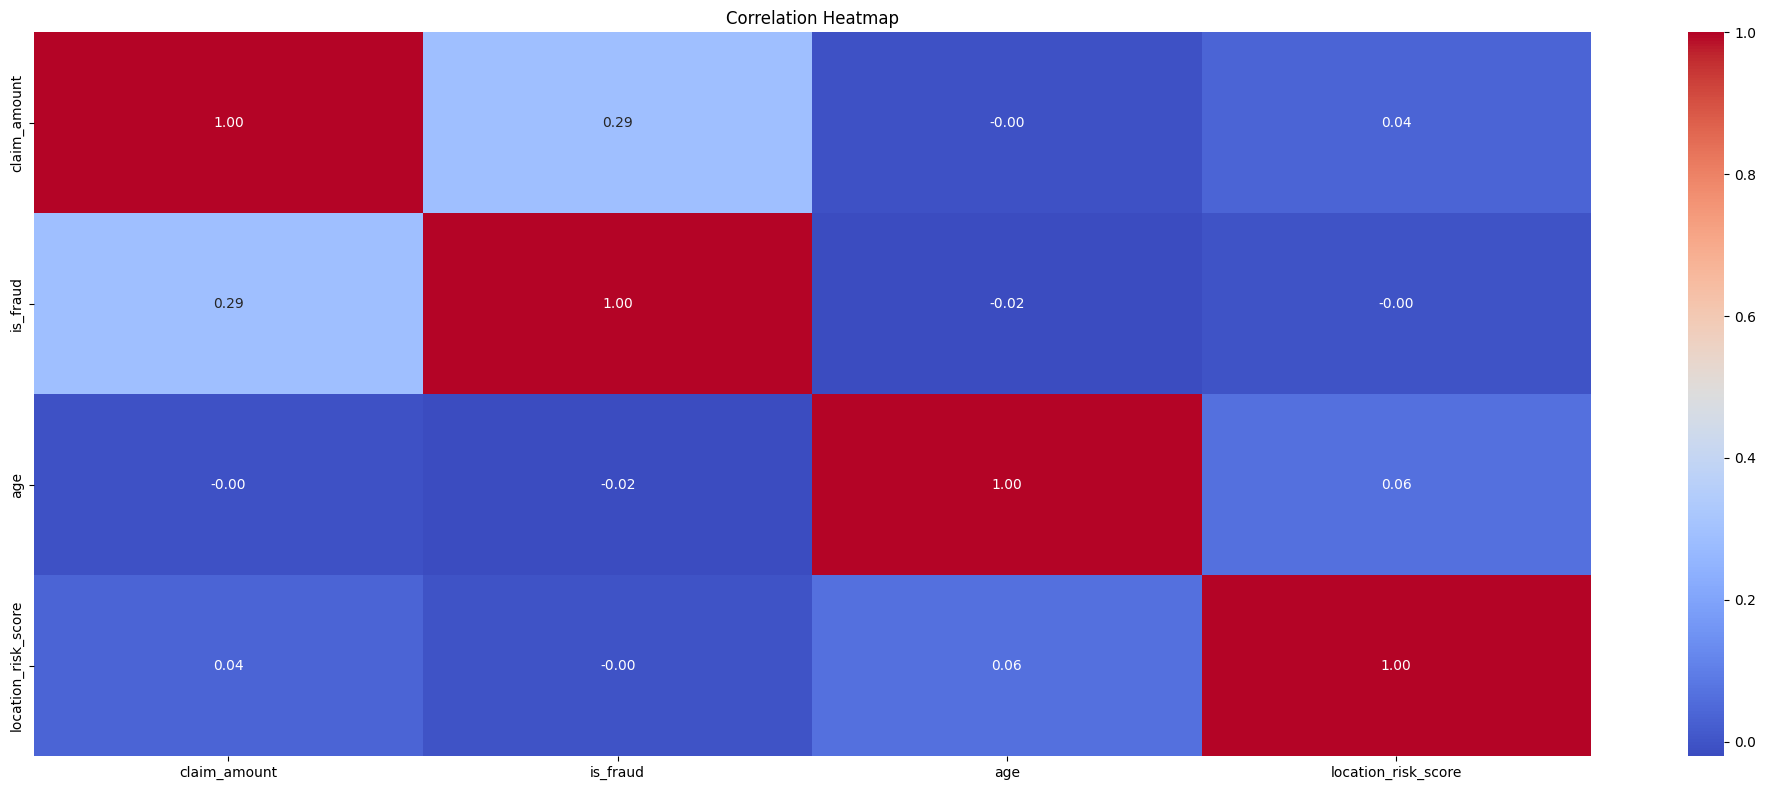

In [ ]:
# Correlation Heatmap
numeric_df = claims_df.select_dtypes(include=[np.number]).dropna()
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("ClaimScope/data/eda_correlation_heatmap.png", dpi=200)
plt.tight_layout()

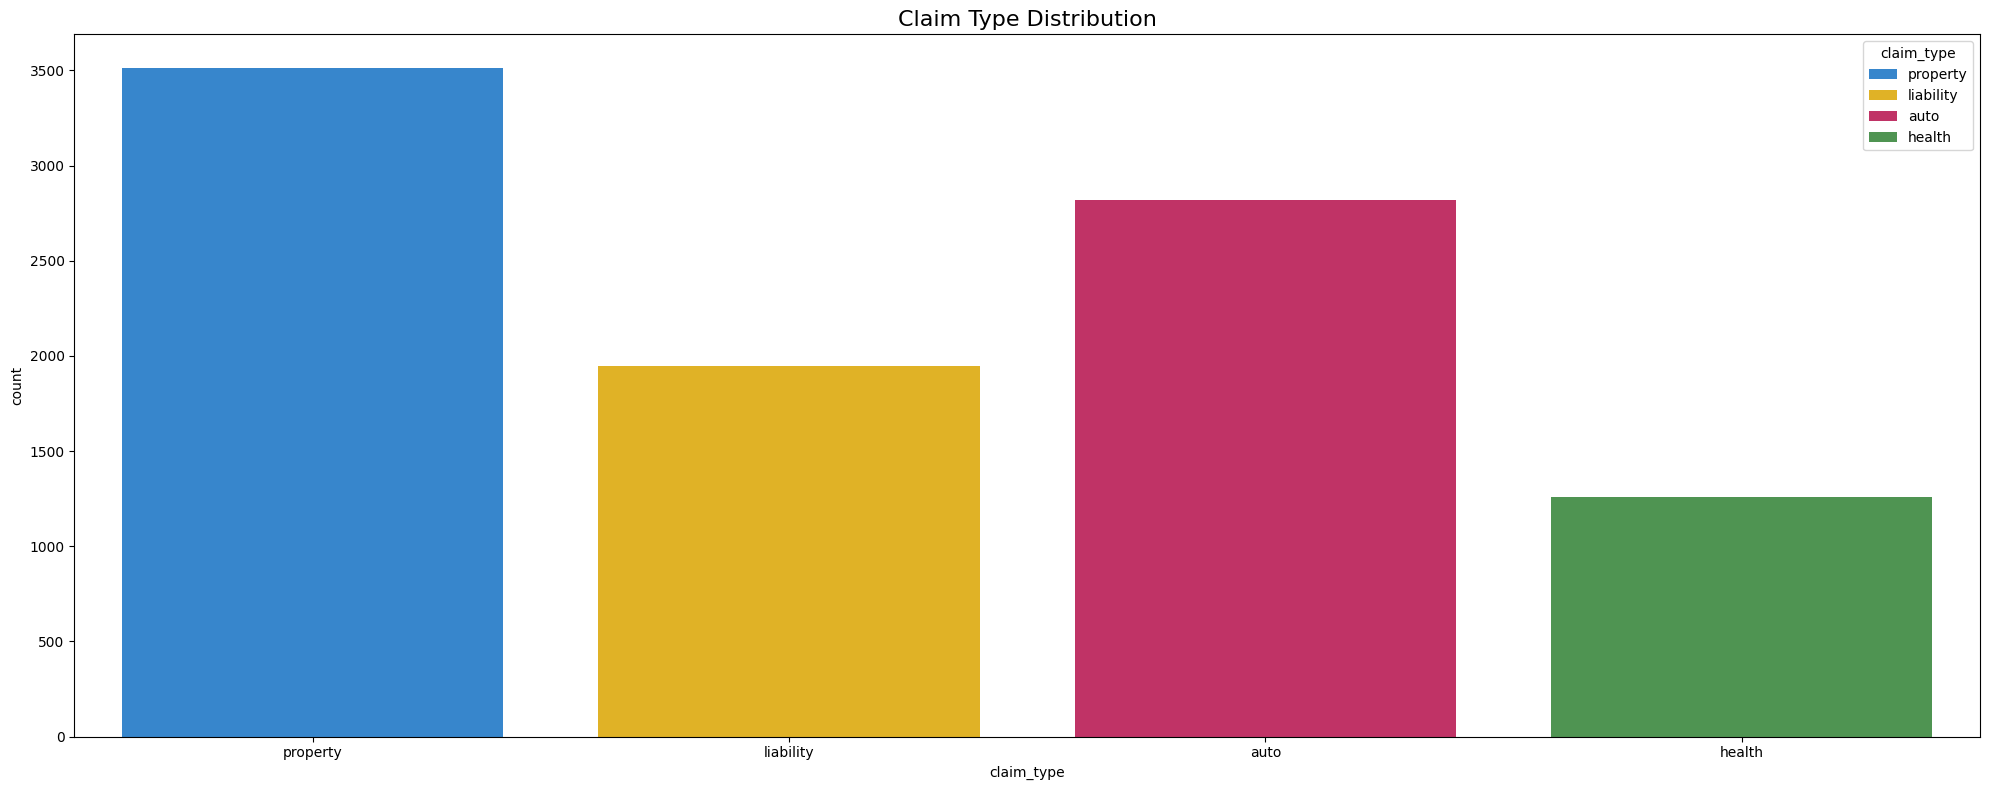

In [10]:
# Categorical Analysis: claim_type distribution
if "claim_type" in claims_df.columns:
        plt.figure(figsize=(20, 8))
        sns.countplot(x="claim_type",
                      data=claims_df,
                      hue="claim_type",
                      palette=["#1E88E5", "#FFC107", "#D81B60", "#43A047"]  # Green, Blue, Orange, Purple
                      )
        plt.title("Claim Type Distribution", fontsize = 16)
        plt.savefig("ClaimScope/data/eda_claim_type_distribution.png", dpi=200)
        plt.tight_layout()

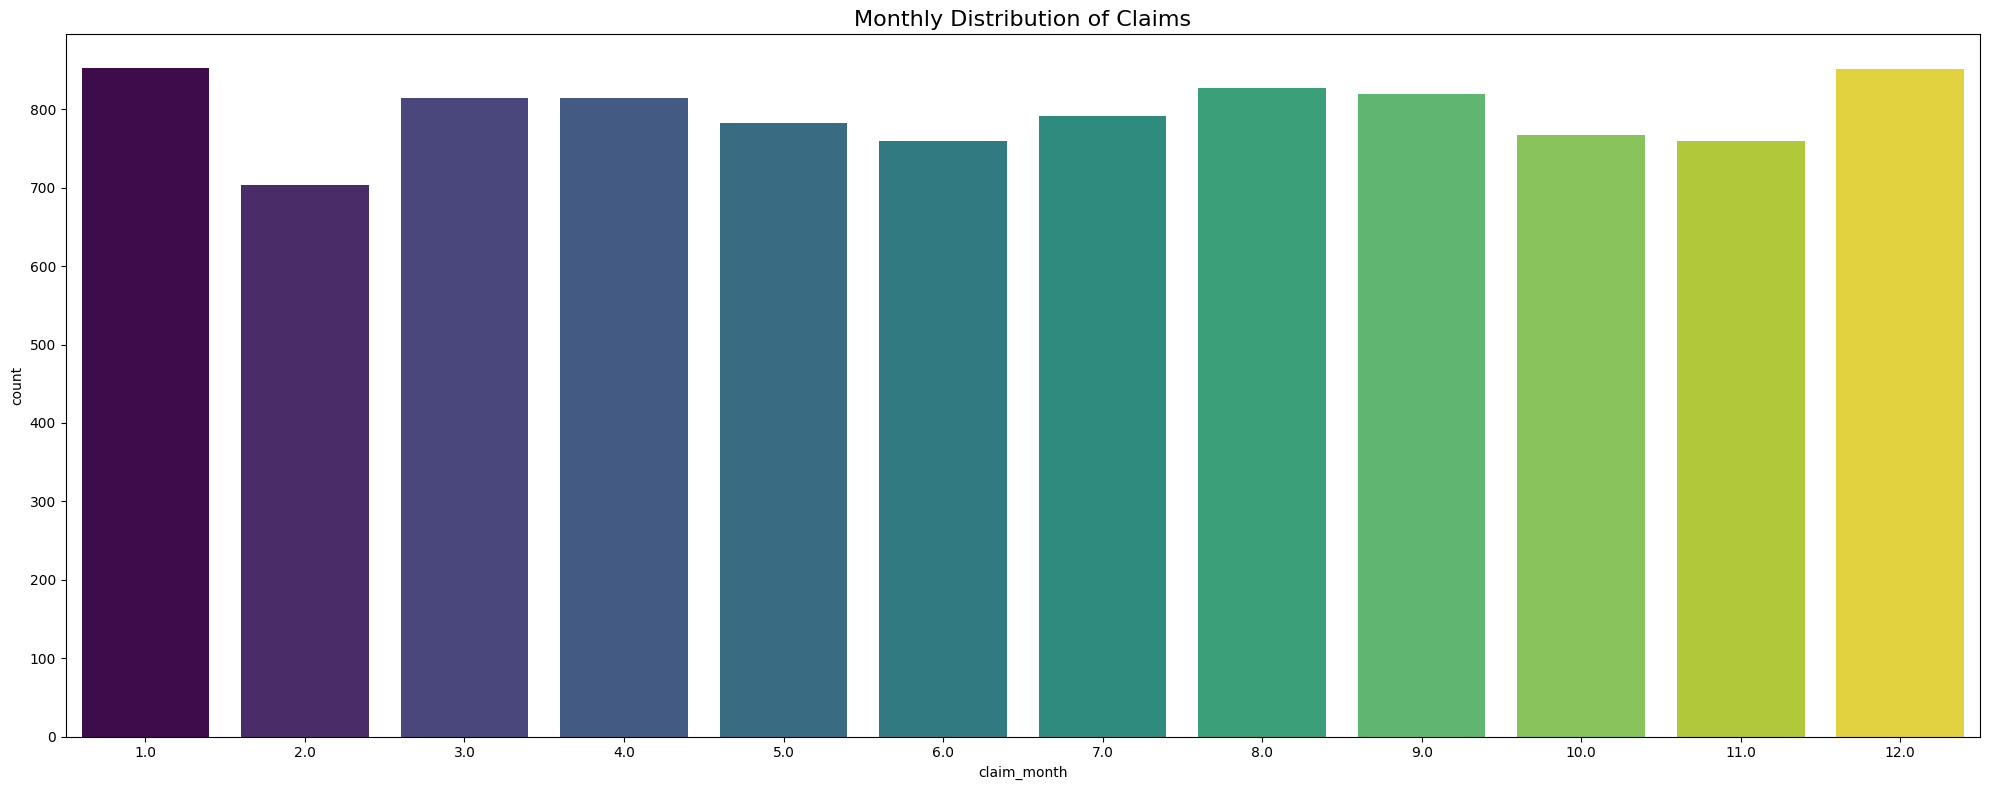

In [22]:
# plot seasonality of claims
claims_df['incident_date'] = pd.to_datetime(claims_df['incident_date'])
claims_df['claim_month'] = claims_df['incident_date'].dt.month.dropna().astype(int)

plt.figure(figsize=(20, 8))
sns.countplot(x="claim_month", data=claims_df, hue="claim_month", palette="viridis", legend=False)
plt.title("Monthly Distribution of Claims", fontsize = 16)
plt.savefig("ClaimScope/data/eda_monthly_distribution.png", dpi=200)
plt.tight_layout()